## Лабораторная работа 4 "Аппроксимации граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности"

In [7]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable

## Общая постановка задачи

Дано следующее уравнение:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}  + f(x), x \in [a, b], t \in [0, T]
$$

Зададим оператор $L$:

$$
L = \frac{\partial}{\partial t} - \frac{\partial^2}{\partial x^2}
$$

Для аппроксимации оператора $L$ с помощью явной схемы используем следующие точки:

![](https://refdb.ru/images/1449/2896254/4b092928.png)

Обозначим для удобства точки следующим образом:

$$
x_{j,k} = (x, t)
$$

Тогда, обозначив разность 
$$x_{j,k}-x_{j-1, k} = h$$
A
$$x_{j,k+1}-x_{j,k}=\tau$$

Получаем:

$$
x_{j-1, k} = (x - h, t)
$$
$$x_{j+1, k} = (x + h, t)
$$
$$
x_{j, k + 1} = (x, t + \tau)
$$
Используя эти точки можем аппроксимировать функции

### 1. Явная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Таким образом результат оператора $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Теперь давайте выразим отсюда $u(x, t + \tau)$:

$$
u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2})
$$

### Итого приведя слагаемые:

$$
u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{2\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 

#### Что в итоге?

Зная значения из нижниго слоя, можно найти значения на верхнем слое

### 2. Неявная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t + \tau) - 2u(x, t + \tau) + y(x-h, t + \tau)}{h^2}
$$

Таким образом результат оператора $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t+\tau) - 2u(x, t+\tau) + y(x-h, t+\tau)}{h^2}
$$

Теперь давайте выразим отсюда $u(x, t)$:

$$
u(x, t) = u(x, t + \tau) - \tau(\frac{u(x + h, t+\tau)}{h^2} + 2 \frac{u(x, t+\tau)}{h^2} - \frac{u(x-h, t+\tau)}{h^2})
$$

### Итого приведя слагаемые:

$$
u(x, t) = -\frac{\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2\tau}{h^2})u(x,t+\tau) - \frac{\tau}{h^2}u(x+h, t+\tau)
$$ 

### Явные схемы

### Формула для явной схема с учётом константы:

$$
u(x, t + \tau) = \frac{c \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(x,t) + \frac{c \cdot \tau}{h^2}u(x+h, t) + \tau\cdot f(x), c - const
$$

#### Первый метод

Правое краевое условие задано следующим образом:

$$
\frac{\partial u}{\partial x}(b, t) = g_2(t)
$$

Для первого метода правое краевое условие будем аппроксимировать по формуле:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Таким образом:

$$
T_N^n = h\cdot g_2(t) + T_{N-1}^n
$$

In [8]:
a = 0
b = 1
k = 1
T = 0.05
phi = lambda x: 0
g1 = lambda t: 0 #math.exp(t)
g2 = lambda t: 0 #math.exp(10*t)
f = lambda x, t: x
N = 100
# h = (b-a) / N
t = (((b-a) / N)**2) / 6

In [66]:
mantissa_len = 10

# standard deviation
def SD_t(m1, m2, layer1, layer2):
    if len(m1[0]) > len(m2[0]):
        m1, m2 = m2, m1
        layer1, layer2 = layer2, layer1
    return np.sqrt(sum((m1[layer1][i] - m2[layer2][2*i])**2 for i in range(len(m1[0]))) / len(m1[0]))

# standard deviation
def SD_h(m1, m2, layer1, layer2):
    return np.sqrt(sum((m1[layer1][i] - m2[layer2][i])**2 for i in range(len(m1[0]))) / len(m1[0]))

def max_deviation_t(m1, m2, layer1, layer2):
    if len(m1[0]) > len(m2[0]):
        m1, m2 = m2, m1
        layer1, layer2 = layer2, layer1
    return max(np.abs([m1[layer1][i] - m2[layer2][2*i] for i in range(len(m1[0]))]))

def max_deviation_h(m1, m2, layer1, layer2):
    return max(np.abs([m1[layer1][i] - m2[layer2][i] for i in range(len(m1[0]))]))

def calculate_with_fix_t(func):
    Ns = np.array([5 * 2**i for i in range(4, -1, -1)])
    table_t = PrettyTable()

    table_t.field_names = ['N : h', 'tau', 's(t=t_n1)', 's(t=t_n2)', 'max_abs(t=t_n1)', 'max_abs(t=t_n2)']

    # select randomly t1 and t2
    layer1 = random.randint(1, Ns[-1] - 1)
    layer2 = random.randint(1, Ns[-1] - 1)

    prev_res = None

    print("t1 = {}, t2 = {}".format(T / Ns[-1] * layer1, T / Ns[-1] * layer2))

    Xs = np.linspace(a, b, Ns[0] + 1)
    tau = 0.5 * (Xs[1] - Xs[0])**2 / k

    for i, N in enumerate(Ns):
        h_x = (b - a) / N
        res = func(N, tau)
#         print(N, len(res), len(res[0]))
        if prev_res is None:
            table_t.add_row([Xs[1] - Xs[0], round(tau, mantissa_len), *list('-'*4)])
        else:
            # compute indexes of t1 and t2
            t11 = layer1 * Ns[i-1] // Ns[-1]
            t12 = layer1 * Ns[i] // Ns[-1]
            t21 = layer2 * Ns[i-1] // Ns[-1]
            t22 = layer2 * Ns[i] // Ns[-1]
            table_t.add_row(list(map(lambda x: round(x, mantissa_len),[
                h_x, 
                tau, 
                SD_t(prev_res, res, t11, t12), 
                SD_t(prev_res, res, t21, t22),
                max_deviation_t(prev_res, res, t11, t12),
                max_deviation_t(prev_res, res, t21, t22),
            ])))
        prev_res = res
        
    print(table_t)
    
    
def calculate_with_fix_h(func):
    Ts = np.array([100*2**i for i in range(5)])
    table_h = PrettyTable()

    table_h.field_names = ['N : h', 'tau', 's(t=t_n1)', 's(t=t_n2)', 'max_abs(t=t_n1)', 'max_abs(t=t_n2)']

    max_tau = T / Ts[0]
    N = int((b-a) / np.sqrt(2 * k * max_tau))
    h = np.sqrt(2 * k * max_tau)

    # select randomly t1 and t2
    layer1 = random.randint(1, Ts[0] - 1)
    layer2 = random.randint(1, Ts[0] - 1)

    prev_res = None

    print("t1 = {}, t2 = {}".format(T / Ts[0] * layer1, T / Ts[0] * layer2))


    for i, h_t in enumerate(Ts):
        tau = T / h_t
        res = func(N, tau)
#         print(N, len(res), len(res[0]))
        if prev_res is None:
            table_h.add_row([h, round(tau, mantissa_len), *list('-'*4)])
        else:
            # compute indexes of t1 and t2
            t11 = layer1 * Ts[i-1] // Ts[0]
            t12 = layer1 * Ts[i] // Ts[0]
            t21 = layer2 * Ts[i-1] // Ts[0]
            t22 = layer2 * Ts[i] // Ts[0]
            table_h.add_row(list(map(lambda x: round(x, mantissa_len),[
                h, 
                tau, 
                SD_h(prev_res, res, t11, t12), 
                SD_h(prev_res, res, t21, t22),
                max_deviation_h(prev_res, res, t11, t12),
                max_deviation_h(prev_res, res, t21, t22),
            ])))
        prev_res = res

    print(table_h)

In [67]:
def explicit_method(N, t):
    num_t = int(T / t) + 1
    num_k = N+1
    h = (b-a) / N
    matrix = np.zeros(shape=(num_t, num_k))


    matrix [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    coef = np.array([k * t / h**2, 1 - 2 * k * t / h**2, k * t / h**2]) # transpose

    for i in range(1, num_t):
        for j in range(1, num_k - 1):
            matrix[i][j] = matrix[i - 1, j-1:j+2].dot(coef) + t * f(a+j*h, i*t)
        matrix[i][-1] = matrix[i][-2] + h*g2(i*t)
    return matrix    

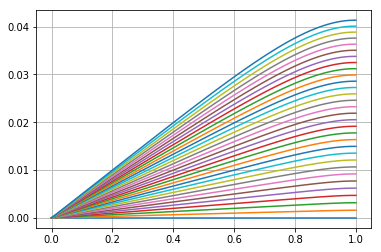

t1 = 0.03, t2 = 0.03
+--------+------------+--------------+--------------+-----------------+-----------------+
| N : h  |    tau     |  s(t=t_n1)   |  s(t=t_n2)   | max_abs(t=t_n1) | max_abs(t=t_n2) |
+--------+------------+--------------+--------------+-----------------+-----------------+
| 0.0125 | 7.8125e-05 |      -       |      -       |        -        |        -        |
| 0.025  | 7.8125e-05 | 0.0010782953 | 0.0010782953 |   0.0017661675  |   0.0017661675  |
|  0.05  | 7.8125e-05 | 0.0005444447 | 0.0005444447 |   0.0009043472  |   0.0009043472  |
|  0.1   | 7.8125e-05 | 0.0002763668 | 0.0002763668 |   0.000462334   |   0.000462334   |
|  0.2   | 7.8125e-05 | 0.0001417152 | 0.0001417152 |   0.0002335604  |   0.0002335604  |
+--------+------------+--------------+--------------+-----------------+-----------------+
t1 = 0.003, t2 = 0.0465
+---------------------+-----------+------------+------------+-----------------+-----------------+
|        N : h        |    tau    | s(t=t_n1)  

In [68]:
xs = np.linspace(a, b, N+1)
sol = explicit_method(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()
calculate_with_fix_t(explicit_method)
calculate_with_fix_h(explicit_method)

#### Второй способ

Правое граничное условие будем аппроксимировать по обычной формуле при помощи добавления фиктивных узлов. Для этого аппроксимируем граничное условие следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Отсюда выразим фиктивный узел:

$$
T_{N+1}^n = 2h\cdot g_2(t) + T_{N-1}^n
$$

Подставив это в нашу исходную формулу получим:

$$
u(b, t + \tau) = \frac{c \cdot \tau}{h^2}u(b-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(b,t) + \frac{c \cdot \tau}{h^2}(
2h\cdot g_2(t) + T_{N-1}^n) + \tau\cdot f(x), c - const
$$

In [69]:
def explicit_method2(N, t):
    num_t = int(T / t) + 1
    num_k = N+1
    h = (b-a) / N
    matrix = np.zeros(shape=(num_t, num_k))


    matrix [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    coef = np.array([k * t / h**2, 1 - 2 * k * t / h**2, k * t / h**2]) # transpose

    for i in range(1, num_t):
        for j in range(1, num_k-1):
            matrix[i, j] = matrix[i - 1, j-1:j+2].dot(coef) + t * f(a+j*h, i*t)
        matrix[i, -1] = 2*k*t/(h**2) * matrix[i-1, -2] + (1-2*k*t/(h ** 2)) * matrix[i-1, -1] + \
                        t * f(b, i*t) + 2*k*(t**3)/(h**2)*g2((i-1)*t)
    return matrix    

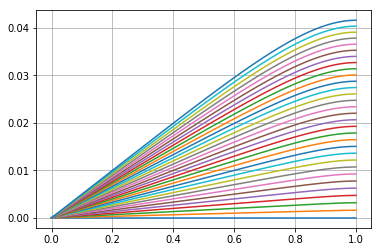

t1 = 0.03, t2 = 0.04
+--------+------------+--------------+--------------+-----------------+-----------------+
| N : h  |    tau     |  s(t=t_n1)   |  s(t=t_n2)   | max_abs(t=t_n1) | max_abs(t=t_n2) |
+--------+------------+--------------+--------------+-----------------+-----------------+
| 0.0125 | 7.8125e-05 |      -       |      -       |        -        |        -        |
| 0.025  | 7.8125e-05 | 0.0010784251 | 0.0014338326 |   0.0017613401  |   0.0023257496  |
|  0.05  | 7.8125e-05 | 0.000543822  | 0.000723855  |   0.0008944603  |   0.0011842121  |
|  0.1   | 7.8125e-05 | 0.0002755455 | 0.0003667608 |   0.0004571834  |   0.0006054976  |
|  0.2   | 7.8125e-05 | 0.0001414786 | 0.0001884186 |   0.0002327643  |   0.000309551   |
+--------+------------+--------------+--------------+-----------------+-----------------+
t1 = 0.023, t2 = 0.004
+---------------------+-----------+------------+------------+-----------------+-----------------+
|        N : h        |    tau    | s(t=t_n1)  |

In [70]:
xs = np.linspace(a, b, N+1)
sol = explicit_method2(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()
calculate_with_fix_t(explicit_method2)
calculate_with_fix_h(explicit_method2)

## Неявные схемы

Для каждой строки матрицы (кроме первой - заполняется начальным условием) необходимо решить систему линейных уравнений (каждый текущий член, зависит от следующего):

$$
u(x, t) + \tau\cdot f(t) = -\frac{с\cdot\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2c\cdot\tau}{h^2})u(x,t+\tau) - \frac{c\cdot\tau}{h^2}u(x+h, t+\tau)
$$ 

$c = const$

Таким образом для нахождения решения можно заполнить матрицу коэффициентов и затем на каждом новом временном слое находить новый вектор свободных членов, т.е матрица будет иметь вид:

$ 1\ 0 .... $

$ k_1\ k_2\ k_3\ ....$

$ 0\ k_1\ k_2\ k_3\ ...$

............

$ 0\ ......\ -1\ 1$'

Взависимости от способа будут отличаться последние строки в нашей матрице коэффициентов и векторе свободных членов

#### Первый способ

Правое краевое условие задано следующим образом:

$$
\frac{\partial u}{\partial x}(b, t) = g_2(t)
$$

Для первого метода правое краевое условие будем аппроксимировать по формуле:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Таким образом:

$$
 - T_{N-1}^n + T_N^n= h\cdot g_2(t)
$$

Таким образом коэффициенты в последней строке матрицы коэффициентов $-1, 1$, а в векторе свободных членов последний элемент $=h\cdot g_2(t)$ 

In [71]:
def inexplicit_method(N, t):
    num_t = int(T / t) + 1
    num_k = N + 1
    h = (b-a) / N
    sol = np.zeros(shape=(num_t, num_k))

    sol [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    sol[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    matrix = np.zeros(shape=(num_k-1, num_k-1))
    matrix[0, 0:2] = [1 + 2*k*t / h ** 2, -k * t / h ** 2]
    for j in range(1, num_k-2):
            matrix[j, j-1] = - k * t / h ** 2 
            matrix[j, j] = 1 + 2*k*t / h ** 2
            matrix[j, j+1] = -k * t / h ** 2
    matrix[-1, -1], matrix[-1, -2] = 1, -1 
    terms = np.zeros(num_k-1)
    for i in range(1, num_t):
        terms[0] = t*f(a+h, i*t) + sol[i-1, 1] + k * t / h ** 2 * sol[i, 0]
        for j in range(1, num_k-2):
            terms[j] = t*f(a+(j+1)*h, i*t) + sol[i-1, j+1]
        terms[-1] = t*g2(i*t)
        sol[i, 1:] = np.linalg.solve(matrix, terms)
    return sol

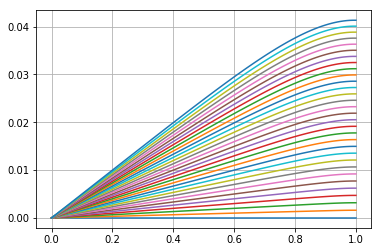

t1 = 0.02, t2 = 0.03
+--------+------------+--------------+--------------+-----------------+-----------------+
| N : h  |    tau     |  s(t=t_n1)   |  s(t=t_n2)   | max_abs(t=t_n1) | max_abs(t=t_n2) |
+--------+------------+--------------+--------------+-----------------+-----------------+
| 0.0125 | 7.8125e-05 |      -       |      -       |        -        |        -        |
| 0.025  | 7.8125e-05 | 0.0007208827 | 0.0010780672 |   0.0011908339  |   0.001765343   |
|  0.05  | 7.8125e-05 | 0.0003635823 | 0.0005443087 |   0.0006075702  |   0.0009035509  |
|  0.1   | 7.8125e-05 | 0.000184391  | 0.0002762612 |   0.000309098   |   0.0004616127  |
|  0.2   | 7.8125e-05 | 9.44921e-05  | 0.0001416608 |   0.0001557402  |   0.0002333016  |
+--------+------------+--------------+--------------+-----------------+-----------------+
t1 = 0.0135, t2 = 0.0095
+---------------------+-----------+------------+------------+-----------------+-----------------+
|        N : h        |    tau    | s(t=t_n1) 

In [72]:
xs = np.linspace(a, b, N + 1)
sol = inexplicit_method(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()
calculate_with_fix_t(inexplicit_method)
calculate_with_fix_h(inexplicit_method)

#### Второй способ

Правое граничное условие будем аппроксимировать по обычной формуле при помощи добавления фиктивных узлов. Для этого аппроксимируем граничное условие следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Отсюда выразим фиктивный узел:

$$
T_{N+1}^n = 2h\cdot g_2(t) + T_{N-1}^n
$$

Подставив это в нашу исходную формулу получим:

$$
-\frac{2c \cdot \tau}{h^2}u(b-h,t) + (1 + \frac{c \cdot \tau}{h^2})u(b,t) = -\frac{c \cdot \tau}{h^2}
2h\cdot g_2(t) + \tau\cdot f(x) + u(b, t), c - const
$$

Отсюда соответственно и берём последнюю строку для матрицы коэффициентов и последний элемент в матрице свободных членов

In [73]:
def inexplicit_method2(N, t):
    num_t = int(T / t) + 1
    num_k = N + 1
    h = (b-a) / N
    sol = np.zeros(shape=(num_t, num_k))

    sol [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    sol[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    matrix = np.zeros(shape=(num_k-1, num_k-1))
    matrix[0, 0:2] = [1 + 2*k*t / h ** 2, -k * t / h ** 2]
    for j in range(1, num_k-2):
            matrix[j, j-1] = - k * t / h ** 2 
            matrix[j, j] = 1 + 2*k*t / h ** 2
            matrix[j, j+1] = -k * t / h ** 2
    matrix[-1, -1], matrix[-1, -2] = -2*k*t / (h**2), 1+2*k*t/(h**2) 
    terms = np.zeros(num_k-1)
    for i in range(1, num_t):
        terms[0] = t*f(a+h, i*t) + sol[i-1, 1] + k * t / h ** 2 * sol[i, 0]
        for j in range(1, num_k-2):
            terms[j] = t*f(a+(j+1)*h, i*t) + sol[i-1, j+1]
        terms[-1] = t*f(a+(j+1)*h, i*t) + sol[i-1, j+1] - 2*k*t/h*g2(i*t)
        sol[i, 1:] = np.linalg.solve(matrix, terms)
    return sol

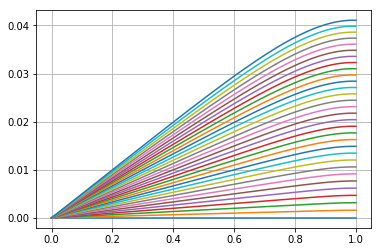

t1 = 0.03, t2 = 0.01
+--------+------------+--------------+--------------+-----------------+-----------------+
| N : h  |    tau     |  s(t=t_n1)   |  s(t=t_n2)   | max_abs(t=t_n1) | max_abs(t=t_n2) |
+--------+------------+--------------+--------------+-----------------+-----------------+
| 0.0125 | 7.8125e-05 |      -       |      -       |        -        |        -        |
| 0.025  | 7.8125e-05 | 0.0010779447 | 0.0003616531 |   0.0017700849  |   0.0006070661  |
|  0.05  | 7.8125e-05 | 0.0005449283 | 0.0001824028 |   0.0009130082  |   0.0003098625  |
|  0.1   | 7.8125e-05 | 0.0002771318 |  9.2453e-05  |   0.0004669599  |   0.0001561291  |
|  0.2   | 7.8125e-05 | 0.0001419771 | 4.73187e-05  |   0.0002343263  |   7.81214e-05   |
+--------+------------+--------------+--------------+-----------------+-----------------+
t1 = 0.0335, t2 = 0.036000000000000004
+---------------------+-----------+------------+------------+-----------------+-----------------+
|        N : h        |    tau  

In [74]:
xs = np.linspace(a, b, N + 1)
sol = inexplicit_method2(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()
calculate_with_fix_t(inexplicit_method2)
calculate_with_fix_h(inexplicit_method2)